In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
X_test.shape

(12630, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

36

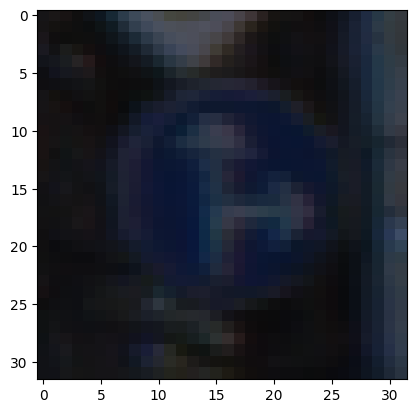

In [9]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation = np.sum(X_validation/3, axis = 3, keepdims = True)

In [12]:
X_train_grey.shape

(34799, 32, 32, 1)

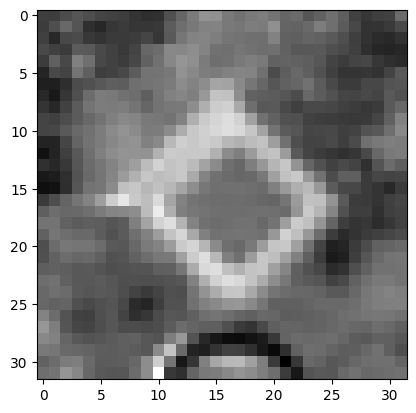

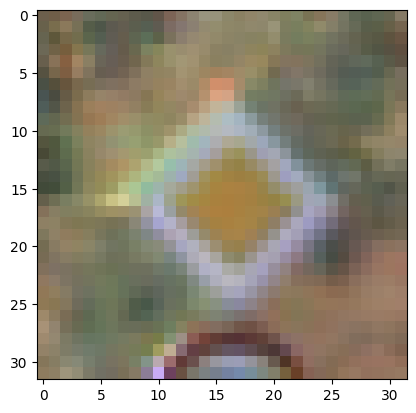

In [13]:
i = 610
plt.imshow(X_train_grey[i].squeeze(), cmap='grey')
plt.figure()
plt.imshow(X_train[i])

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [15]:
image_shape = X_train_grey[i].shape

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='relu'))



In [20]:
cnn_model.compile(loss = 'sparse_catergorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])